# 01.5 - Fontes externas, limpeza e manipulação de dados
## Tratamento, exploração e visualização de dados Tratamento, exploração e visualização de dados

Dataset: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Valor total
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)

In [7]:
#importando biblioteca pandas
import pandas as pd

In [8]:
#lendo o arquivo csv com algumas especificações de enconding, padrão do separador ";",
#e identificador de milhares e decimal
#também foi usado os parametros skip pra pular as 3 primeiras e 12 ultimas linhas q não fazem parte dos dados em si!
dados = pd.read_csv("../datasets/A202613189_28_143_208.csv", encoding="ISO-8859-1",
                   skiprows = 3, sep=";", skipfooter=12,
                   thousands=".", decimal=",",engine="python")
#mostrando apenas os primeiros dados do dataframe
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [9]:
#formatando as casas decimais
pd.options.display.float_format = "{:.2f}".format

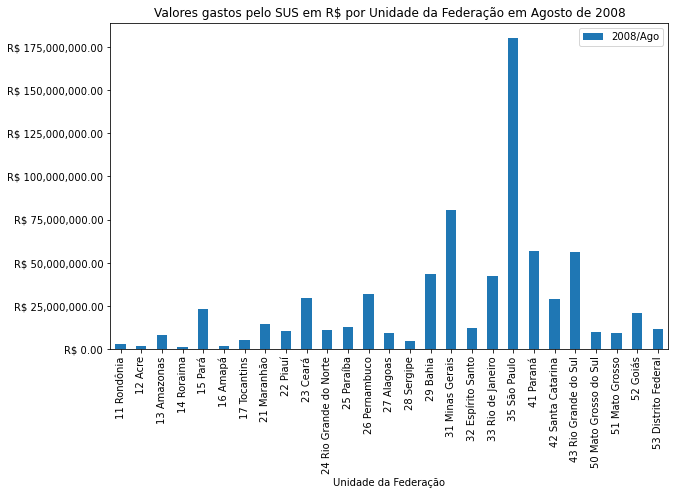

In [10]:
#O pandas não é uma biblioteca gráfica, por conta disso, vamos importar uma biblioteca especifica para plotagem de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()

In [11]:
#Pegamos apenas os anos usaveis
colunas_usaveis = dados.mean().index.tolist()
#adicionamos o indice 0 como "Unidade da Federação"
colunas_usaveis.insert(0, "Unidade da Federação")

In [12]:
dados[colunas_usaveis].head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [13]:
#criamos um dataframe "usaveis"
usaveis = dados[colunas_usaveis]

In [14]:
#Setamos o index "Unidade da Federação"
usaveis = usaveis.set_index("Unidade da Federação")

In [15]:
usaveis = usaveis.drop("Total", axis=1)

In [16]:
#Usando valores pseudo-aleatórios com uma seed predefinida
import numpy as np
np.random.seed(687942)

usaveis.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43


In [17]:
usaveis["Total"] = usaveis.sum(axis=1)

In [19]:
#Ordenando pelos estados do que mais gastou para o que menos gastou
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

In [20]:
estados = ordenado_por_total.head(5).index.to_list()
estados

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro']

In [22]:
estados.append("42 Santa Catarina")
estados

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '42 Santa Catarina',
 '42 Santa Catarina']

In [23]:
#pegando apenas os dados após esse outlier de 2008/Jan
colunas_interessadas = ordenado_por_total.columns[6:]

In [24]:
#adicionando regiões!
col_regiao=[]
regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for row in ordenado_por_total.iterrows():
    
    estado=row[0]
    num_reg = int(estado.split(' ')[0])
    new_estado = estado.split(' ', maxsplit =1)[1]
    filtrados = ordenado_por_total.rename(index={estado:new_estado})
    
    if num_reg < 20:
        col_regiao.append(regioes[0])
    elif num_reg < 30:
        col_regiao.append(regioes[1])
    elif num_reg < 40:
        col_regiao.append(regioes[2])
    elif num_reg < 50:
        col_regiao.append(regioes[3])
    else:
        col_regiao.append(regioes[4])

In [25]:
ordenado_por_total["Região"] = col_regiao

In [26]:
estados_sudeste = ordenado_por_total["Região"] == "Sudeste"
#adicionando paraná no sudeste :D
estados_sudeste["41 Paraná"] = True

In [29]:
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2021/Mar'

<AxesSubplot:xlabel='Unidade da Federação'>

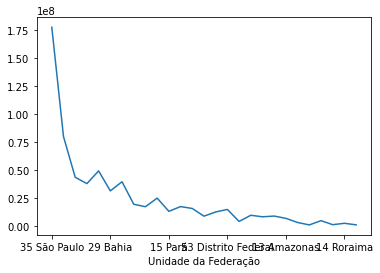

In [30]:
gasto_do_mais_recente = ordenado_por_total[mes_mais_recente]
gasto_do_mais_recente.plot()

<AxesSubplot:xlabel='Unidade da Federação'>

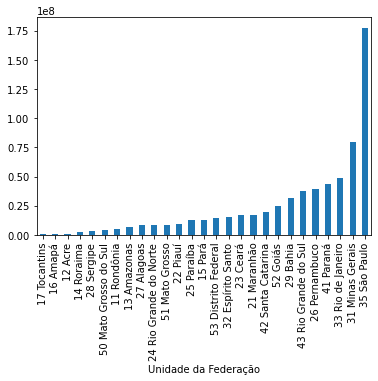

In [31]:
gasto_do_mais_recente.sort_values().plot(kind='bar')

In [32]:
gasto_do_mais_recente

Unidade da Federação
35 São Paulo             177408317.71
31 Minas Gerais           79780838.00
41 Paraná                 43480729.07
43 Rio Grande do Sul      37798832.80
33 Rio de Janeiro         49149884.48
29 Bahia                  31314602.44
26 Pernambuco             39472738.81
42 Santa Catarina         19375822.56
23 Ceará                  17173151.55
52 Goiás                  24867001.02
15 Pará                   13069564.31
21 Maranhão               17294509.11
32 Espírito Santo         15606368.11
24 Rio Grande do Norte     8733455.36
25 Paraíba                12517894.05
53 Distrito Federal       14731938.43
50 Mato Grosso do Sul      4035989.77
22 Piauí                   9542151.53
27 Alagoas                 8180887.21
51 Mato Grosso             8835890.09
13 Amazonas                6799060.80
28 Sergipe                 3081081.42
17 Tocantins                928756.84
11 Rondônia                4732441.04
12 Acre                    1137341.65
14 Roraima                 23

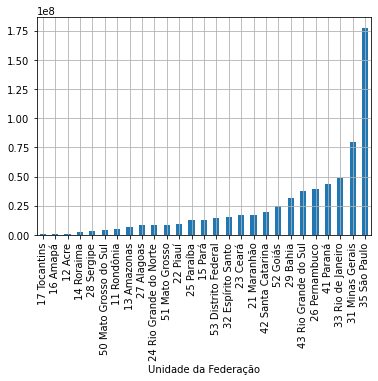

In [35]:
gasto_do_mais_recente.sort_values().plot(kind='bar')
plt.grid() #adiciona o grid no grafico!

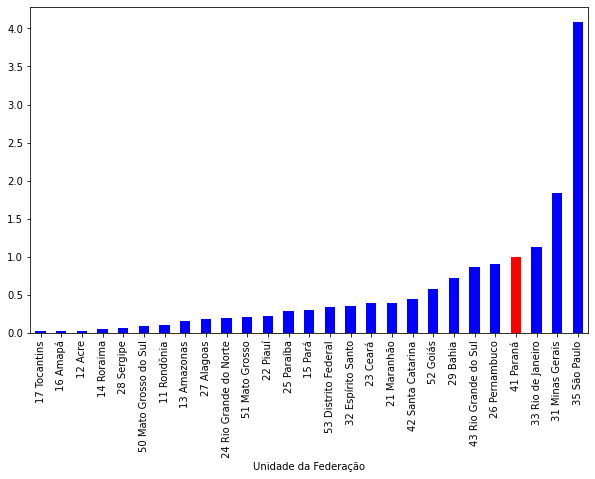

In [39]:
#grafico em função do paraná, por exemplo, são paulo é 4 vezes maior q o paraná!
func_parana = gasto_do_mais_recente / gasto_do_mais_recente["41 Paraná"]

listacores = []
for i in func_parana.sort_values(ascending=True).index:
    if i[0:2] != "41":
        listacores.append("blue")
    else:
        listacores.append("red")        
        
ax = func_parana.sort_values(ascending=True).plot(kind='bar', figsize=(10,6), color=listacores)

Gastos proporcionais em %


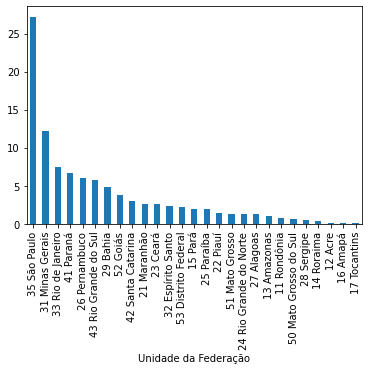

In [46]:
gastos_proporcionais = (gasto_do_mais_recente / gasto_do_mais_recente.sum())*100
gastos_proporcionais.sort_values(ascending=False).plot(kind="bar")
print("Gastos proporcionais em %")

 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)